In [53]:
import torch, random

from models.encoder import ProteinEncoderCNN
from utils.episodes import loaded_encoded_families, EpisodeSampler

if torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

fams = loaded_encoded_families("../data/encoded")
sampler = EpisodeSampler(fams, N=5, K= 5, Q=20, device=device)

sx, sy, qx, qy = sampler.sample_episode()
model = ProteinEncoderCNN().to(device).eval()
with torch.no_grad():
    Zs = model(sx).cpu()
    Zq = model(qx).cpu()

Saved results/umap_episode.png


<Figure size 640x480 with 0 Axes>

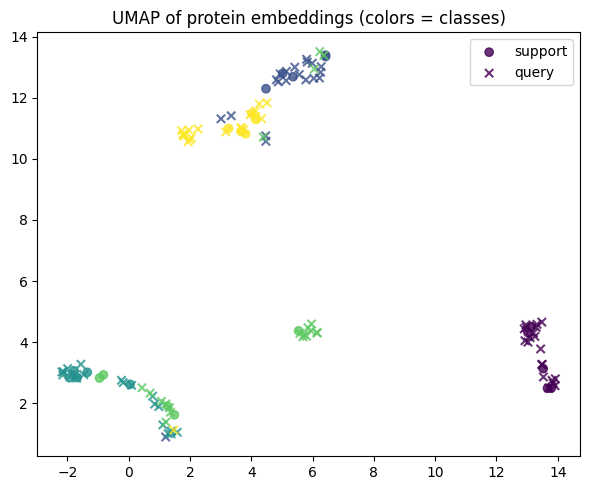

In [20]:
import umap, numpy as np, matplotlib.pyplot as plt, os
os.makedirs("results", exist_ok=True)
plt.savefig("results/umap_episode.png", dpi=160)

# Z = np.vstack([Zs.numpy(), Zq.numpy()])
# y = np.hstack([sy.cpu().numpy(), qy.cpu().numpy()])
# U = umap.UMAP().fit_transform(Z)

# plt.figure(figsize=(5,4))
# for c in sorted(set(y)):
#     idx = (y==c)
#     plt.scatter(U[idx,0], U[idx,1], s=18, label=f"class {c}", alpha=0.8)
# plt.legend(); plt.title("Support+Query embeddings (UMAP)")
# plt.tight_layout(); plt.savefig("../results/umap_episode.png", dpi=180); plt.show()
Z  = torch.cat([Zs,Zq]).cpu().numpy()
y  = torch.cat([sy, qy]).cpu().numpy()
is_q = np.r_[np.zeros(len(sy), bool), np.ones(len(qy), bool)]
U = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='cosine').fit_transform(Z)

plt.figure(figsize=(6,5))
plt.scatter(U[~is_q,0], U[~is_q,1], c=y[~is_q], marker='o', alpha=0.8, label='support')
plt.scatter(U[ is_q,0], U[ is_q,1], c=y[ is_q], marker='x', alpha=0.8, label='query')
plt.title("UMAP of protein embeddings (colors = classes)")
plt.legend(); plt.tight_layout()
plt.savefig("results/umap_episode.png", dpi=160)
print("Saved results/umap_episode.png")